# INSTALLATIONS / LIBRARIES IMPORT / API CLIENT

In [1]:
pip install eurostatapiclient 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Attribution https://github.com/opus-42/eurostat-api-client


In [2]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install geoplot

Note: you may need to restart the kernel to use updated packages.


In [4]:
#MODULES
from eurostatapiclient import EurostatAPIClient 

VERSION = '1.0'
FORMAT = 'json'
LANGUAGE = 'en'

client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

#LIBRARIES
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=UserWarning) 

import pandas as pd
import numpy as np
import xlrd

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm 

import plotly.express as px
import plotly.graph_objects as go

# DATA

In [5]:
dataset = client.get_dataset('met_gind3')
print(dataset.label)

df = dataset.to_dataframe()
print(df.head())


Demographic balance and crude rates by metropolitan regions
    values freq  indic_de metroreg  time
0  12836.0    A  CNMIGRAT       BE  2000
1  34386.0    A  CNMIGRAT       BE  2001
2  38665.0    A  CNMIGRAT       BE  2002
3  33611.0    A  CNMIGRAT       BE  2003
4  33392.0    A  CNMIGRAT       BE  2004


In [7]:
def df_caracterization():
    print(f'Caracterization:')
    df.info()
    print(f'Rows and Columns: {df.shape}')
    df.reset_index()
    return df.head(5)

In [8]:
df_caracterization()

Caracterization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92851 entries, 0 to 92850
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   values    47237 non-null  float64
 1   freq      92851 non-null  object 
 2   indic_de  92851 non-null  object 
 3   metroreg  92851 non-null  object 
 4   time      92851 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.5+ MB
Rows and Columns: (92851, 5)


,values,freq,indic_de,metroreg,time
0,12836.0,A,CNMIGRAT,BE,2000
1,34386.0,A,CNMIGRAT,BE,2001
2,38665.0,A,CNMIGRAT,BE,2002
3,33611.0,A,CNMIGRAT,BE,2003
4,33392.0,A,CNMIGRAT,BE,2004


### STANDARIZATION & DATA SELECTION

- Rename columns.
- Remove all empty rows, and innecessary columns as freq. (All annual frequency)
- Demographic dataframe creation

In [9]:
df.rename(columns={"indic_de": "indicator"}, inplace = True)
trash = ["freq"]
df = df.drop(trash, axis=1)
df = df.dropna(how='all')

In [10]:
df.tail(5)

,values,indicator,metroreg,time
92846,NaN,NATGROWRT,TR_NM,2018
92847,NaN,NATGROWRT,TR_NM,2019
92848,NaN,NATGROWRT,TR_NM,2020
92849,NaN,NATGROWRT,TR_NM,2021
92850,NaN,NATGROWRT,TR_NM,2022


In [11]:
def explore_duplicates(df):
    duplicate_rows = df.duplicated().sum()
    print(f"There are {df.duplicated().sum()} duplicate rows. Also;")  
def explore_nan(df):
    nan_values = df.isna().sum()
    empty_spaces = df.eq(' ').sum()
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    return exploration

In [12]:
explore_duplicates(df)
explore_nan(df)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
values,45614,0
indicator,0,0
metroreg,0,0
time,0,0


In [13]:
df2 = df.dropna(axis=0)

In [14]:
explore_duplicates(df2)
explore_nan(df2)

There are 0 duplicate rows. Also;


,NaN,EmptySpaces
values,0,0
indicator,0,0
metroreg,0,0
time,0,0


In [15]:
df2.shape

(47237, 4)

### DF INDICATOR SELECTOR

In [16]:
df2["indicator"].unique()

array(['CNMIGRAT', 'CNMIGRATRT', 'DEATH', 'GBIRTHRT', 'GDEATHRT', 'GROW',
       'GROWRT', 'JAN', 'LBIRTH', 'NATGROW', 'NATGROWRT'], dtype=object)

In [17]:
indicator_selector = ['NATGROW', 'CNMIGRAT']
df2 = df2[df2['indicator'].map(lambda x: x in indicator_selector)]

In [18]:
df2.shape

(14183, 4)

### BANANAS CREATION

In [19]:
df2["metroreg"].unique()

array(['BE', 'BE001MC', 'BE002M', 'BE003M', 'BE004M', 'BE005M', 'BE007M',
       'BE_NM', 'BG', 'BG001MC', 'BG002M', 'BG003M', 'BG004M', 'BG_NM',
       'CZ', 'CZ001MC', 'CZ002M', 'CZ003M', 'CZ004M', 'CZ_NM', 'DK',
       'DK001MC', 'DK002M', 'DK003M', 'DK004M', 'DK_NM', 'DE', 'DE001MC',
       'DE002M', 'DE003M', 'DE004M', 'DE005M', 'DE007M', 'DE008M',
       'DE009M', 'DE011M', 'DE012M', 'DE013M', 'DE014M', 'DE017M',
       'DE018M', 'DE019M', 'DE020M', 'DE021M', 'DE025M', 'DE027M',
       'DE028M', 'DE031M', 'DE032M', 'DE033M', 'DE034M', 'DE035M',
       'DE036M', 'DE037M', 'DE038M', 'DE039M', 'DE040M', 'DE042M',
       'DE043M', 'DE044M', 'DE045M', 'DE052M', 'DE054M', 'DE057M',
       'DE059M', 'DE061M', 'DE064M', 'DE069M', 'DE073M', 'DE074M',
       'DE077M', 'DE079M', 'DE083M', 'DE084M', 'DE504M', 'DE507M',
       'DE510M', 'DE513M', 'DE517M', 'DE520M', 'DE522M', 'DE523M',
       'DE524M', 'DE527M', 'DE529M', 'DE532M', 'DE533M', 'DE534M',
       'DE537M', 'DE540M', 'DE542M', 'DE5

In [20]:
blue_gold = ["AT","UK", "FR", "BE", "DE", "NL","LU", "IT", "ES"]
df2 = df2[df2['metroreg'].str.startswith(tuple(blue_gold))]

In [21]:
df2.shape

(8919, 4)

In [22]:
blue = ['BE001MC', 'BE002M', 'BE003M', 'BE004M',
       'BE005M', 'BE007M', 'BE_NM', 'DE003M', 'DE004M', 'DE005M',"UK001MC","UK569M","UK546M","UK017M","UK513M","UK520M","UK019M","UK017M","UK515M", "UK560M" "UK023M", "UK025M","UK539M","UK528M","DE549M","DE038M","DE504M","DE045M","DE546M","DE004M", "DE034M", "DE548M", "DE507M", "DE042M", "DE079M", "DE057M","DE020M", "DE037M", "DE005M", "DE025M", "DE061M", "DE524M", "DE077M", "DE040M", "DE044M", "DE084M", "DE522M", "DE529M", "DE035M", "DE533M", "DE007M", "DE073M", "DE027M", "DE054M", "DE532M", "DE537M", "DE059M", "DE014M", "DE534M", "DE028M", "DE003M", "DE033M", "DE069M","AT004M","AT005M","FR009M", "FR014M", "FR016M", "FR006M", "FR040M", "IT002M", "IT511M", "IT029M", "IT012M", "IT028M", "IT011M"]

In [23]:
gold = ["ES005M","ES007M","ES021M", "ES003M", "ES002M", "ES010M", "FR043M", "FR010M","FR044M","FR203M", "FR205M", "FR026M" "FR004M","IT004M", "IT006M", "IT503M", "IT505M", "IT009M", "IT502M", "IT007M"]

In [24]:
dfb = df2[df2['metroreg'].apply(lambda x: x in blue)]
dfg = df2[df2['metroreg'].apply(lambda x: x in gold)]

In [25]:
dfb.shape

(2815, 4)

In [26]:
dfg.shape

(783, 4)

# GEODATA

In [27]:
dfnut = gpd.read_file("NUTS_RG_20M_2021_3035.geojson")

In [28]:
dfnut = dfnut.drop(columns=['CNTR_CODE', 'NAME_LATN', 'NUTS_NAME', 'MOUNT_TYPE', 'URBN_TYPE', 'COAST_TYPE'])
dfnut.columns = dfnut.columns.str.lower().str.replace(" ","_")

In [29]:
dfnut

,id,nuts_id,levl_code,fid,geometry
0,FR,FR,0,FR,"MULTIPOLYGON (((9954236.116 -3059379.316, 9961..."
1,HR,HR,0,HR,"MULTIPOLYGON (((4827385.889 2618351.326, 48483..."
2,HU,HU,0,HU,"POLYGON ((5214660.069 2880853.832, 5216710.220..."
3,AL,AL,0,AL,"POLYGON ((5129579.170 2204098.752, 5148385.473..."
4,AT,AT,0,AT,"POLYGON ((4742889.368 2876362.725, 4783217.798..."
...,...,...,...,...,...
2005,TRC21,TRC21,3,TRC21,"POLYGON ((6904684.585 2120354.802, 6938677.828..."
2006,TRC22,TRC22,3,TRC22,"POLYGON ((6989716.599 2273670.524, 6982786.486..."
2007,NO0B2,NO0B2,3,NO0B2,"MULTIPOLYGON (((4754167.335 6382461.409, 47465..."
2008,NO0B,NO0B,2,NO0B,"MULTIPOLYGON (((4754167.335 6382461.409, 47465..."


In [30]:
dfcodenut = pd.read_excel("NUTS_Tipologies.xlsx")

In [32]:
dfcodenut.columns = dfcodenut.columns.str.lower().str.replace(" ","_")

In [33]:
dfcodenut = dfcodenut[dfcodenut["metro_region_corresponding_to_the_nuts"] == "Y"]


array(['BE', 'DE', 'ES', 'FR', 'IT', 'LU', 'NL', 'AT', 'UK'], dtype=object)

In [35]:
dfcodenut["nuts_3_id_(2010)"].unique()

array(['BE100', 'BE211', 'BE231', 'BE233', 'BE234', 'BE241', 'BE242',
       'BE310', 'BE322', 'BE326', 'BE331', 'BE332', 'BE334', 'BE353',
       'DE111', 'DE112', 'DE113', 'DE114', 'DE115', 'DE116', 'DE117',
       'DE118', 'DE122', 'DE123', 'DE125', 'DE126', 'DE128', 'DE129',
       'DE12B', 'DE131', 'DE132', 'DE133', 'DE134', 'DE138', 'DE139',
       'DE141', 'DE144', 'DE145', 'DE211', 'DE212', 'DE213', 'DE217',
       'DE218', 'DE219', 'DE21A', 'DE21B', 'DE21C', 'DE21E', 'DE21H',
       'DE21I', 'DE21J', 'DE21K', 'DE21L', 'DE226', 'DE232', 'DE238',
       'DE242', 'DE246', 'DE24B', 'DE252', 'DE253', 'DE254', 'DE255',
       'DE257', 'DE258', 'DE259', 'DE25B', 'DE261', 'DE262', 'DE263',
       'DE264', 'DE265', 'DE268', 'DE269', 'DE26A', 'DE26B', 'DE26C',
       'DE271', 'DE275', 'DE276', 'DE279', 'DE300', 'DE404', 'DE405',
       'DE406', 'DE408', 'DE409', 'DE40A', 'DE40C', 'DE40E', 'DE40H',
       'DE501', 'DE502', 'DE600', 'DE711', 'DE712', 'DE713', 'DE714',
       'DE715', 'DE7

In [40]:
dfnexusnut = dfcodenut_2.rename(columns={"metro_region_code": "metroreg", "nuts_3_id_(2010)": "nuts_id"})

In [ ]:
#dfcodenut = dfcodenut[dfcodenut["rural_-_urban_typology"] != "Intermediate region"]

In [43]:
dfcode_blue = dfnexusnut[dfnexusnut['metroreg'].apply(lambda x: x in blue)]
dfcode_gold = dfnexusnut[dfnexusnut['metroreg'].apply(lambda x: x in gold)]

In [49]:
dfbcode = pd.merge(dfb,dfcode_blue, on = 'metroreg', how = "outer")
dfgcode= pd.merge(dfg,dfcode_gold, on = 'metroreg', how = "outer")

In [61]:
dfgeoblue = pd.merge(dfnut,dfbcode, on = 'nuts_id', how = "inner")
dfgeogolden = pd.merge(dfnut,dfgcode, on = 'nuts_id', how = "inner")

In [67]:
dfnut["nuts_id"].nunique()

2010

In [68]:
dfgeoblue = dfgeoblue.drop(columns = ["id", "levl_code", "fid"])
dfgeoblue = dfgeoblue[["nuts_id","metroreg","metro_region_name", "indicator","values", "time","geometry"]]
dfgeoblue

,nuts_id,metroreg,metro_region_name,indicator,values,time,geometry
0,DE254,DE014M,Nürnberg,CNMIGRAT,5480.0,2000,"POLYGON ((4395582.127 2936362.696, 4406400.516..."
1,DE254,DE014M,Nürnberg,CNMIGRAT,9277.0,2001,"POLYGON ((4395582.127 2936362.696, 4406400.516..."
2,DE254,DE014M,Nürnberg,CNMIGRAT,6246.0,2002,"POLYGON ((4395582.127 2936362.696, 4406400.516..."
3,DE254,DE014M,Nürnberg,CNMIGRAT,4381.0,2003,"POLYGON ((4395582.127 2936362.696, 4406400.516..."
4,DE254,DE014M,Nürnberg,CNMIGRAT,3518.0,2004,"POLYGON ((4395582.127 2936362.696, 4406400.516..."
...,...,...,...,...,...,...,...
6535,UKH32,UK001MC,London,NATGROW,101849.0,2014,"POLYGON ((3664855.621 3200561.199, 3655081.772..."
6536,UKH32,UK001MC,London,NATGROW,98594.0,2015,"POLYGON ((3664855.621 3200561.199, 3655081.772..."
6537,UKH32,UK001MC,London,NATGROW,100435.0,2016,"POLYGON ((3664855.621 3200561.199, 3655081.772..."
6538,UKH32,UK001MC,London,NATGROW,95115.0,2017,"POLYGON ((3664855.621 3200561.199, 3655081.772..."


In [69]:
dfgeogolden["nuts_id"].unique()

array(['ES243', 'ES511', 'ES521', 'ES523', 'ES532', 'ES620', 'ITH52',
       'ITH55', 'ITI14', 'ITI15', 'ITC11', 'ITC33'], dtype=object)

In [70]:
dfgeogolden = dfgeogolden.drop(columns = ["id", "levl_code", "fid"])
dfgeogolden = dfgeogolden[["nuts_id","metroreg","metro_region_name", "indicator","values", "time","geometry"]]
dfgeogolden

,nuts_id,metroreg,metro_region_name,indicator,values,time,geometry
0,ES243,ES005M,Zaragoza,CNMIGRAT,4009.0,2000,"POLYGON ((3512138.620 2085822.679, 3514609.288..."
1,ES243,ES005M,Zaragoza,CNMIGRAT,9337.0,2001,"POLYGON ((3512138.620 2085822.679, 3514609.288..."
2,ES243,ES005M,Zaragoza,CNMIGRAT,12256.0,2002,"POLYGON ((3512138.620 2085822.679, 3514609.288..."
3,ES243,ES005M,Zaragoza,CNMIGRAT,10025.0,2003,"POLYGON ((3512138.620 2085822.679, 3514609.288..."
4,ES243,ES005M,Zaragoza,CNMIGRAT,13651.0,2004,"POLYGON ((3512138.620 2085822.679, 3514609.288..."
...,...,...,...,...,...,...,...
515,ITC33,IT006M,Genova,NATGROW,-6934.0,2017,"POLYGON ((4257616.285 2389495.859, 4280666.859..."
516,ITC33,IT006M,Genova,NATGROW,-7179.0,2018,"POLYGON ((4257616.285 2389495.859, 4280666.859..."
517,ITC33,IT006M,Genova,NATGROW,-6958.0,2019,"POLYGON ((4257616.285 2389495.859, 4280666.859..."
518,ITC33,IT006M,Genova,NATGROW,-9732.0,2020,"POLYGON ((4257616.285 2389495.859, 4280666.859..."


In [71]:
df_geobluenatgrow = dfgeoblue[dfgeoblue["indicator"] == "NATGROW"]

In [72]:
df_geogoldennatgrow = dfgeogolden[dfgeogolden["indicator"] == "NATGROW"]

<Axes: >

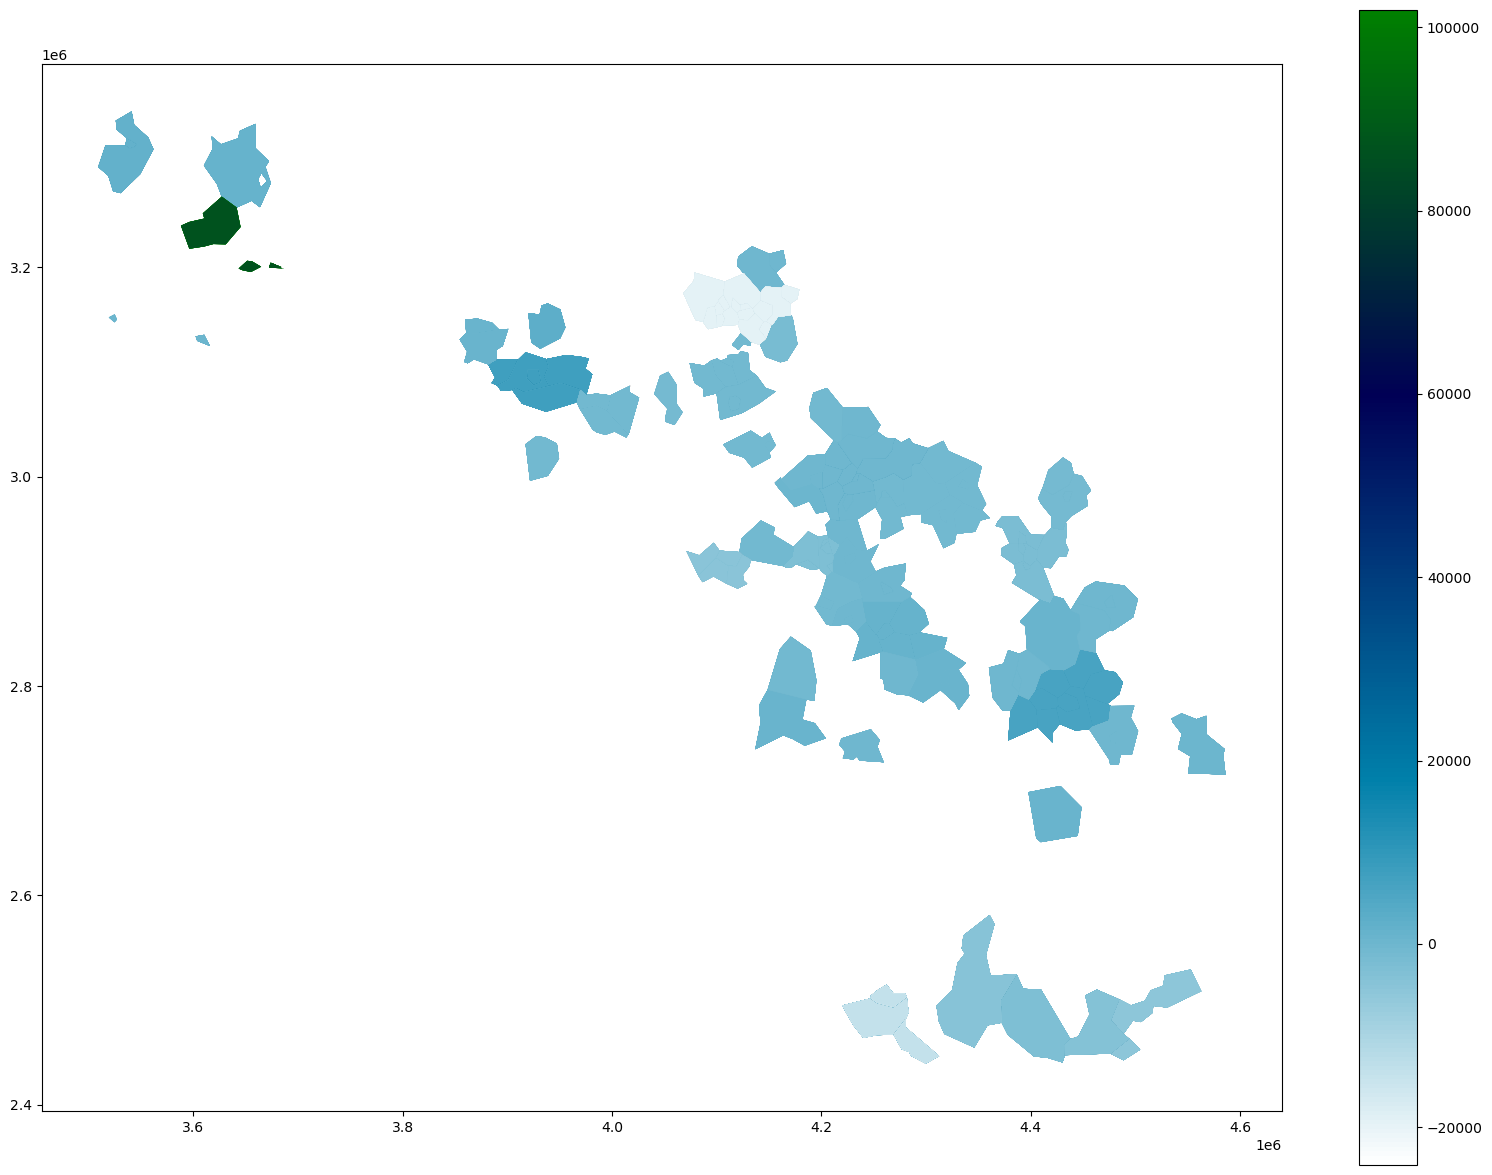

In [73]:
df_geobluenatgrow.plot("values", legend = True, cmap = "ocean_r", figsize = (20,15))

<Axes: >

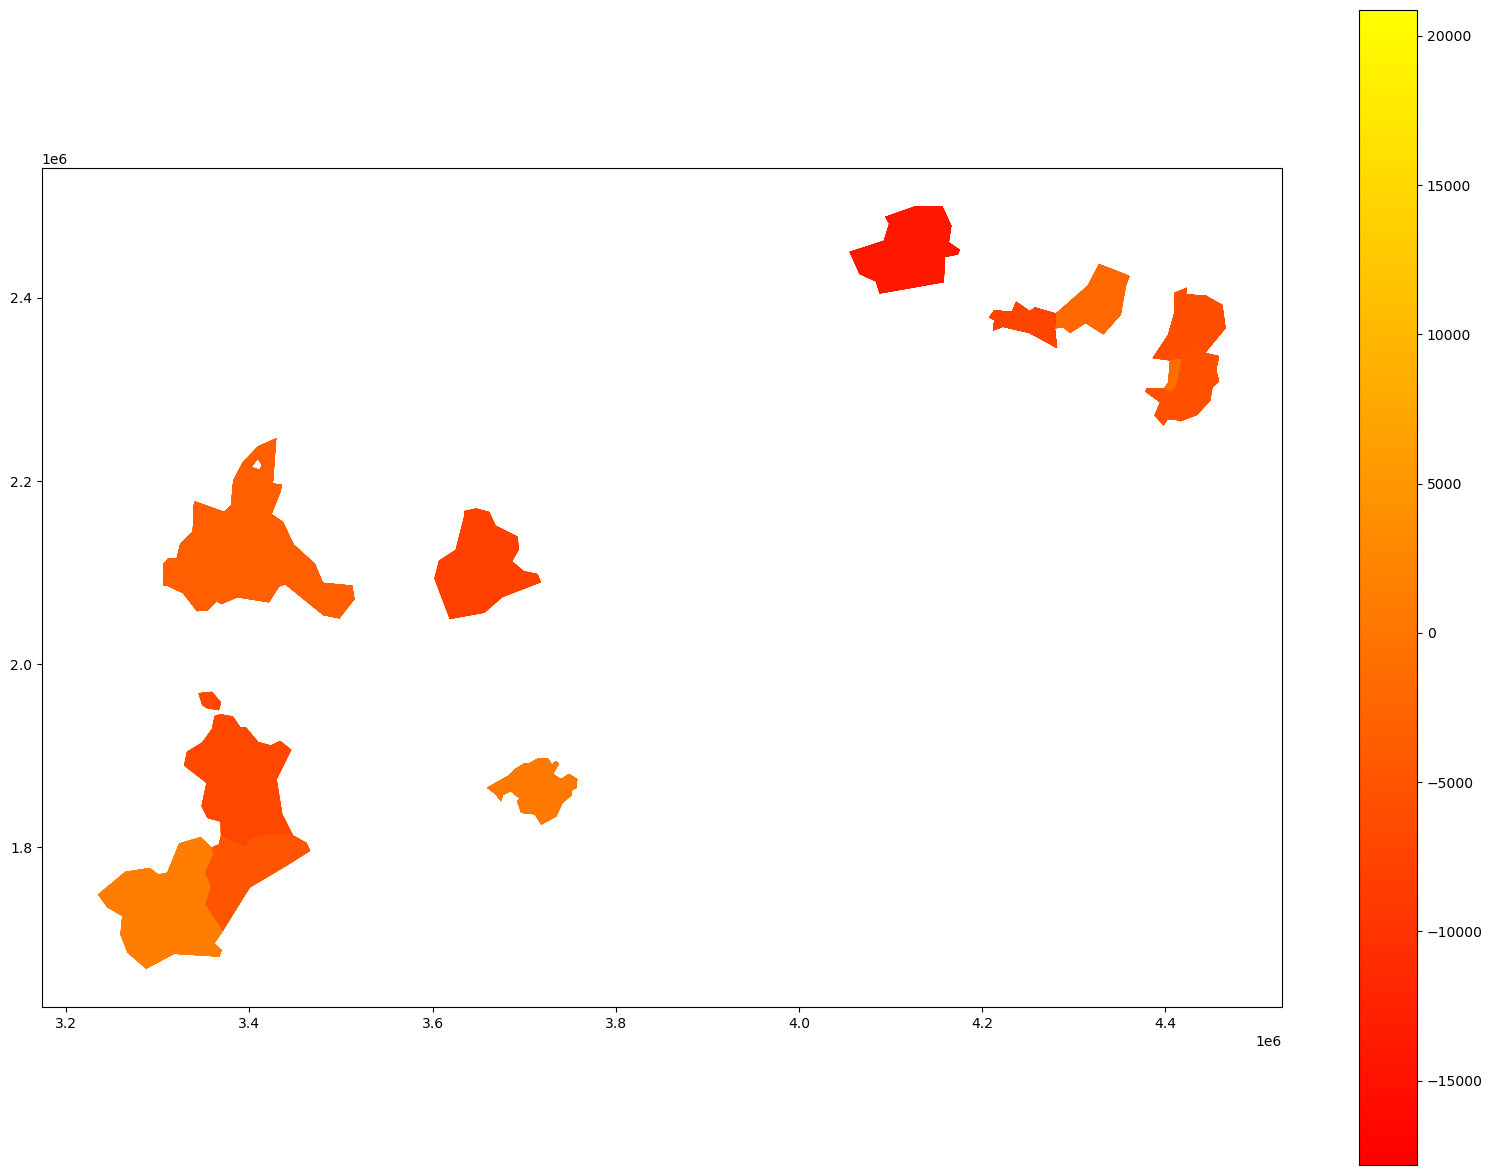

In [74]:
df_geogoldennatgrow.plot("values", legend = True, cmap = 'autumn', figsize = (20,15))

In [75]:
df_geobluenatinmgrow = dfgeoblue[dfgeoblue["indicator"] == "CNMIGRAT"]

In [76]:
df_geogoldennatinmgrow = dfgeogolden[dfgeogolden["indicator"] == "CNMIGRAT"]

<Axes: >

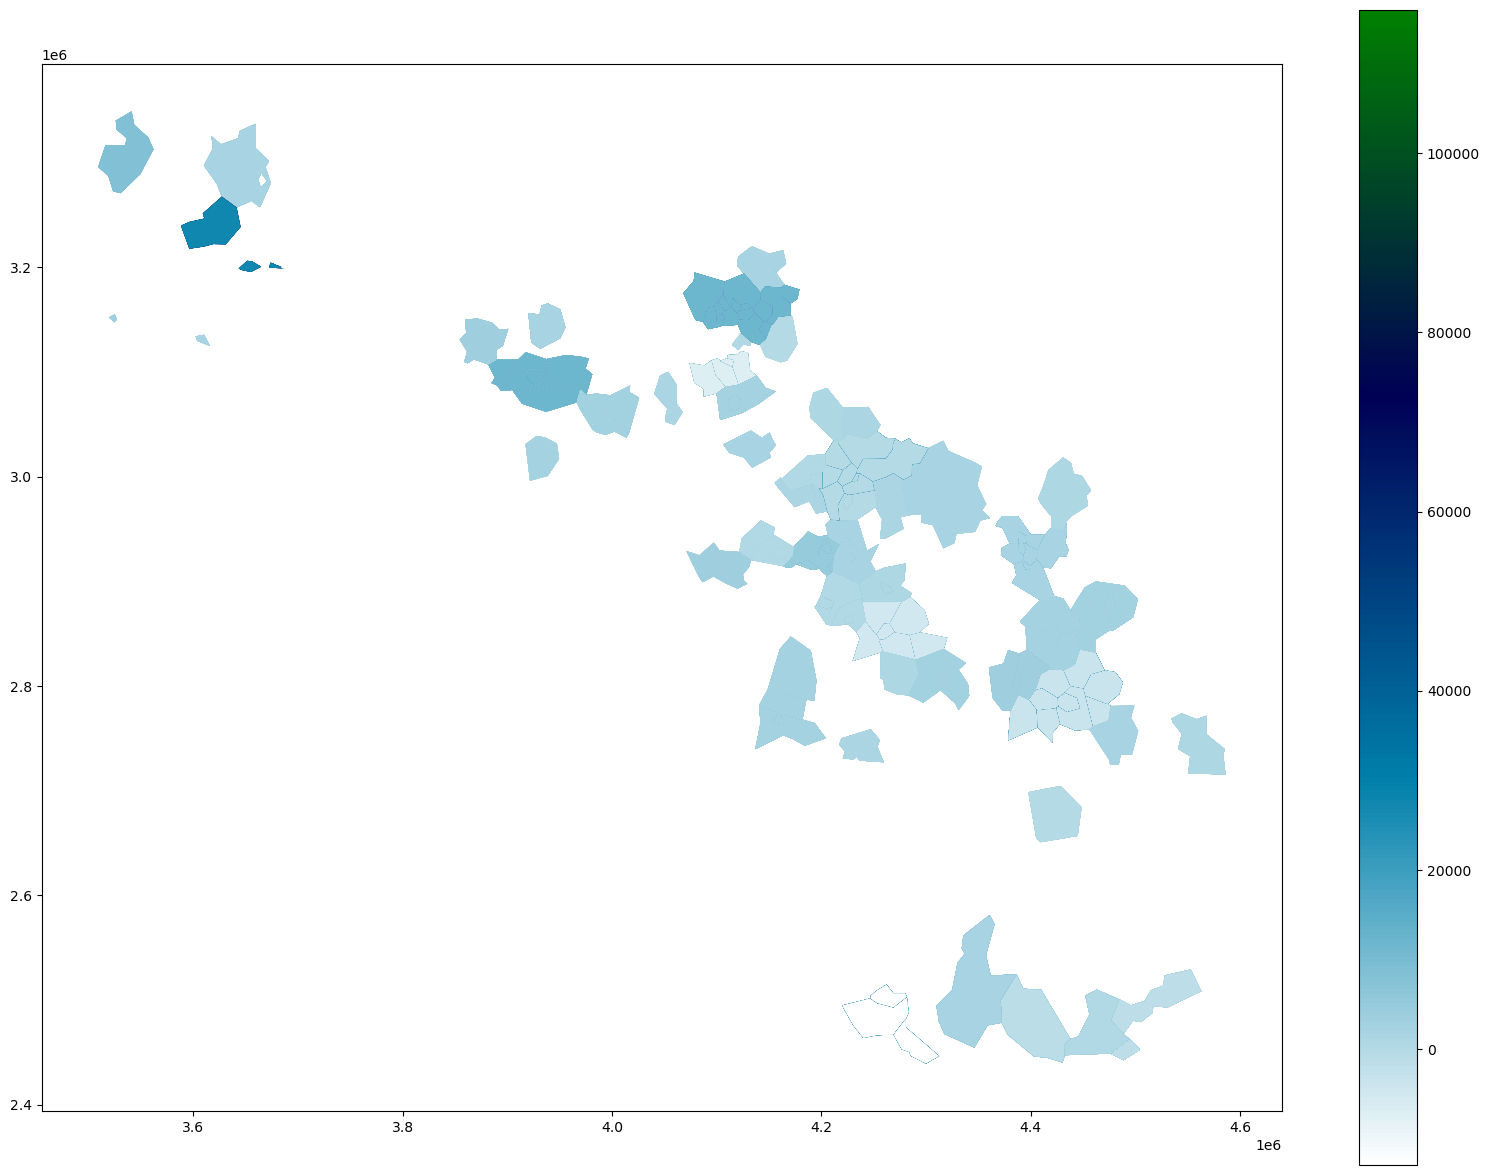

In [77]:
df_geobluenatinmgrow.plot("values", legend = True, cmap = "ocean_r",figsize = (20,15))

<Axes: >

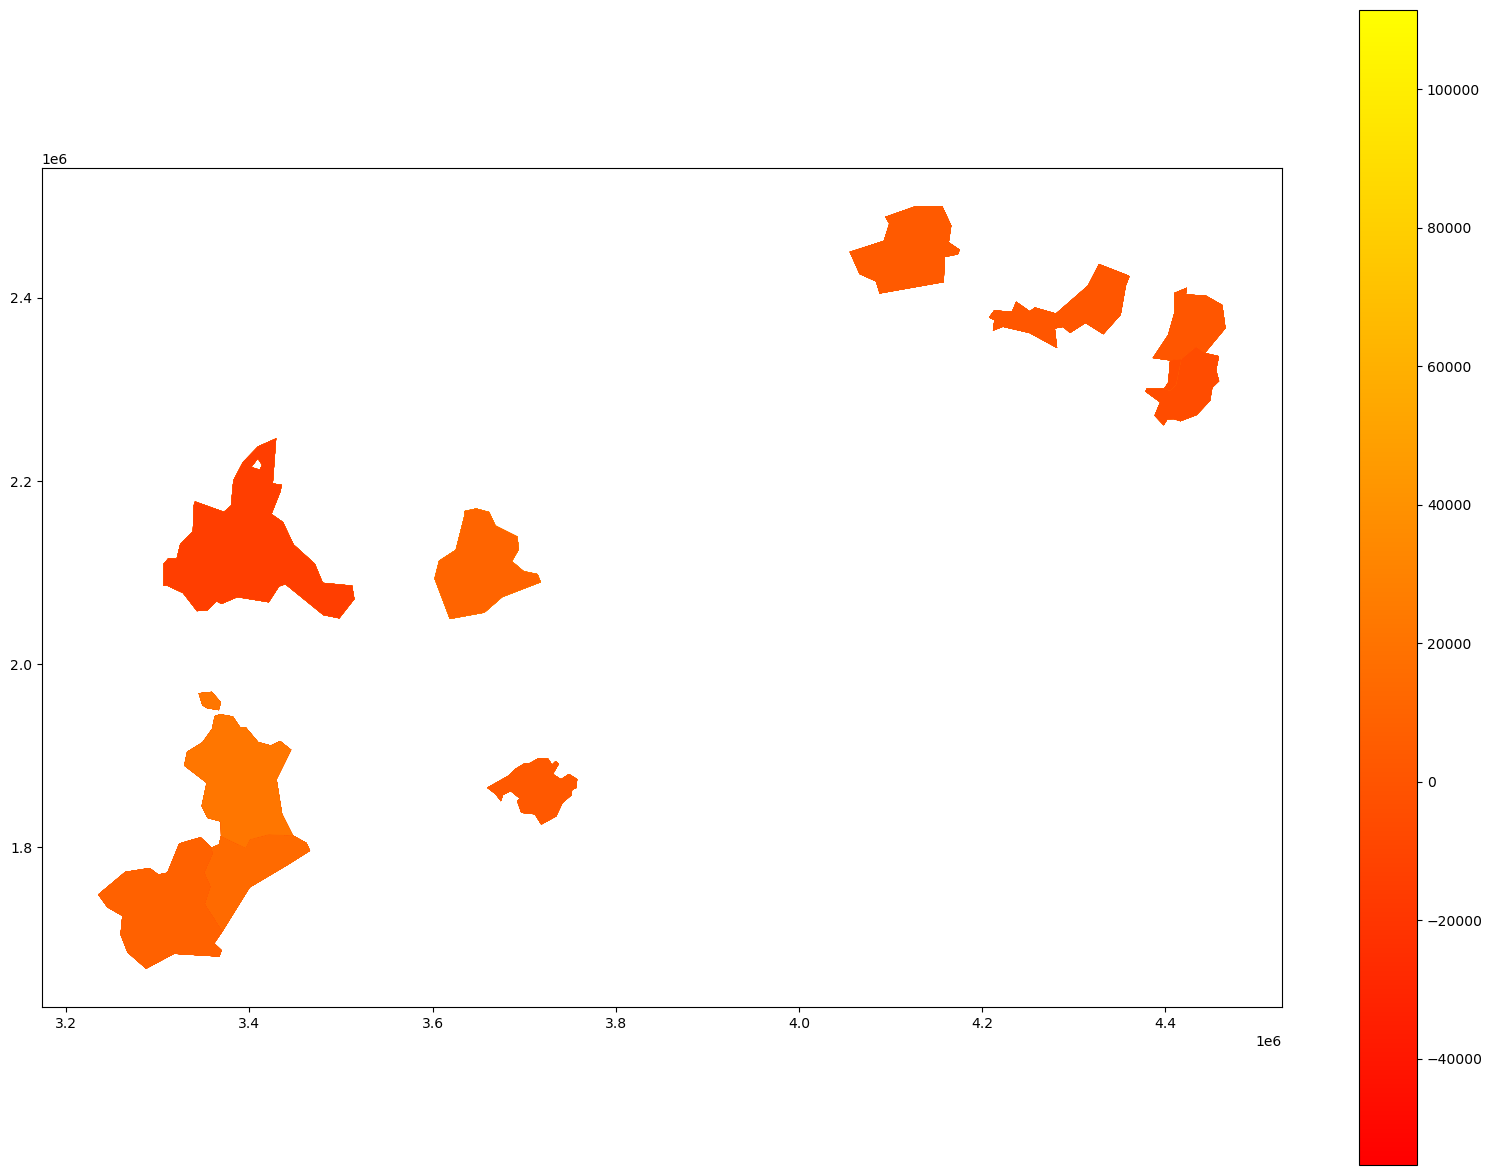

In [78]:
df_geogoldennatinmgrow.plot("values", legend = True, cmap = 'autumn', figsize = (20,15))

<Axes: >

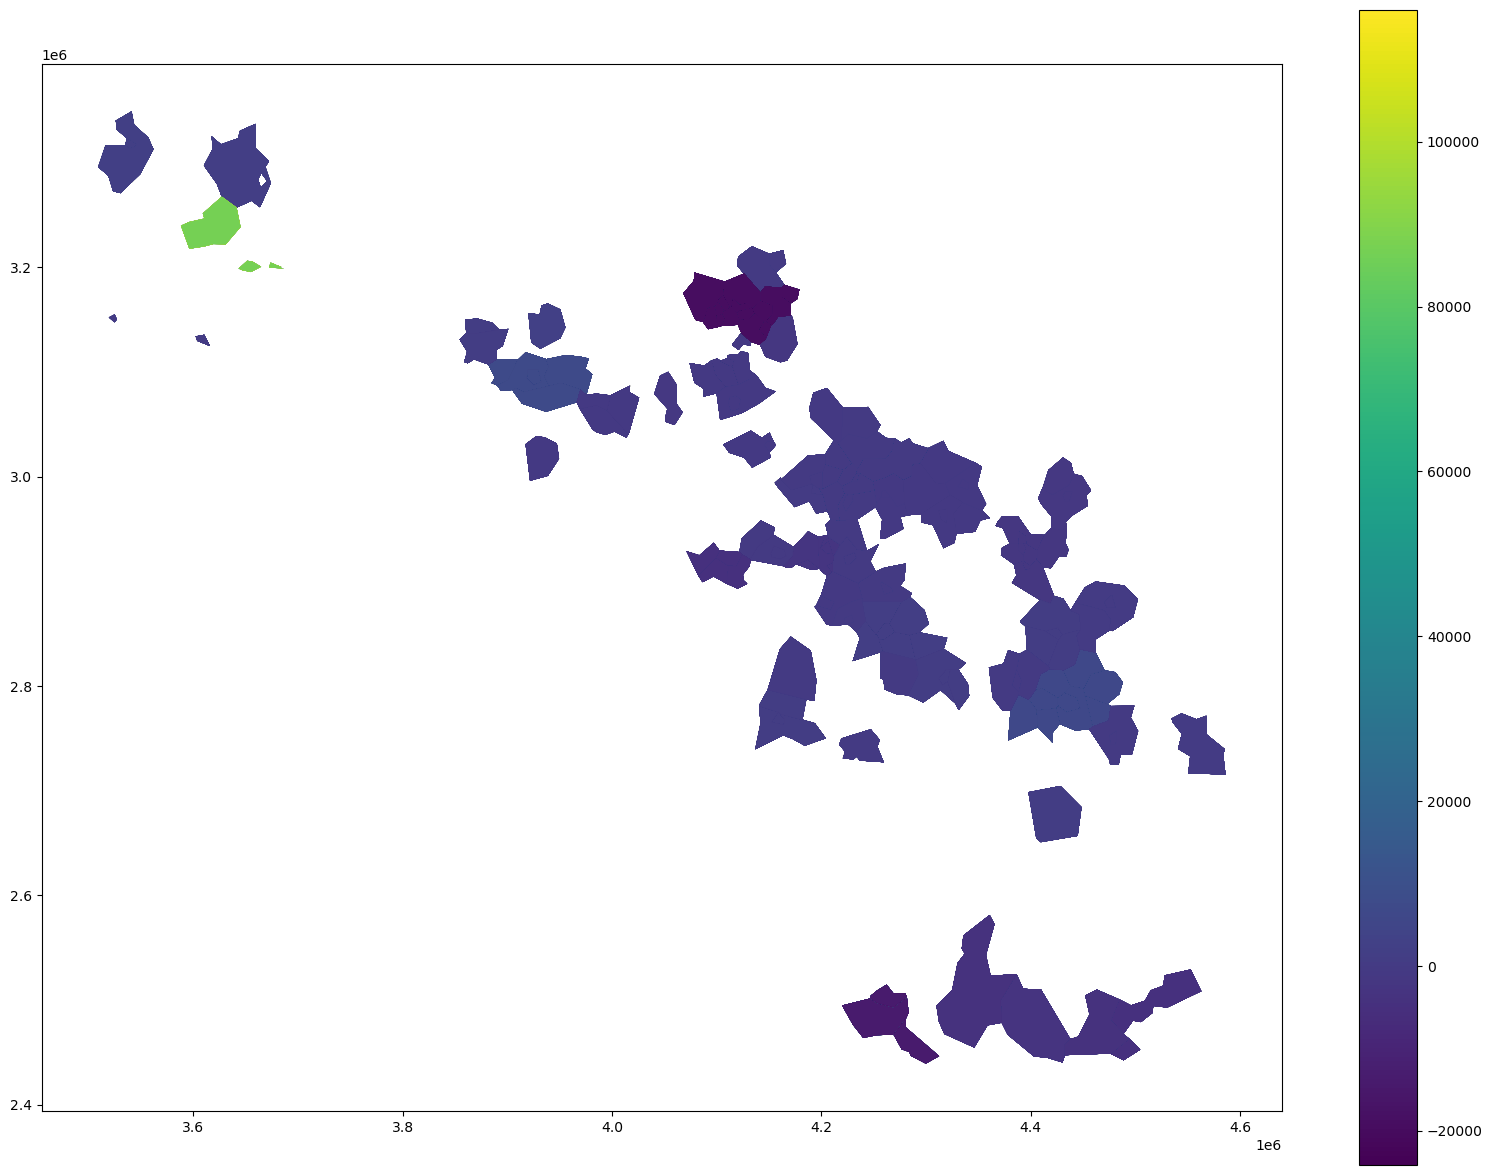

In [79]:
dfgeoblue.plot("values", legend = True, figsize = (20,15))

<Axes: >

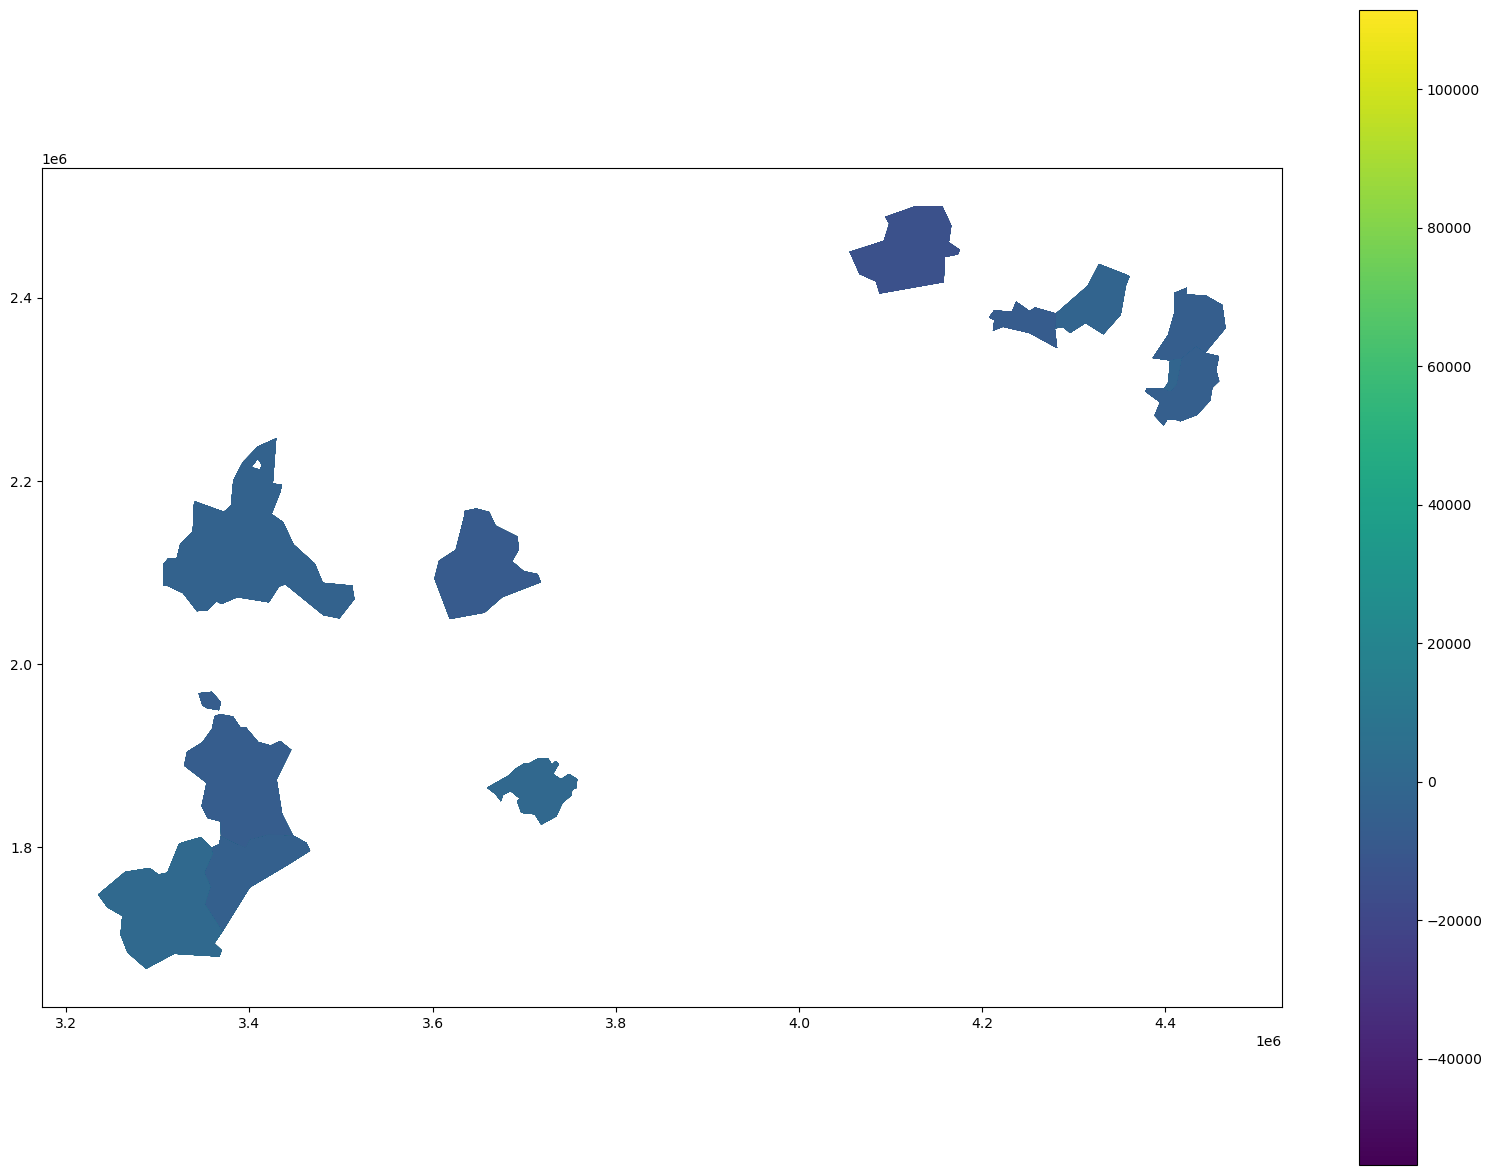

In [80]:
dfgeogolden.plot("values", legend = True, figsize = (20,15))

In [82]:
dfgeoblue["envolvente"] = dfgeoblue.convex_hull

<Axes: >

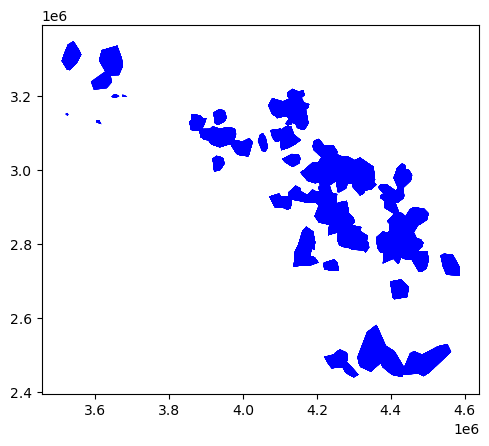

In [83]:
dfgeoblue["envolvente"].plot(alpha = 0.5, color = "blue", linewidth = 0.5)  #Guarda esto en variables

In [85]:
dfgeogolden["envolvente"] = dfgeogolden.convex_hull

In [ ]:
dfgeogolden["envolvente"].plot(alpha = 0.5, color = "gold" , linewidth = 1) #Guarda esto en variables

In [ ]:
fig = px.choropleth(dfbcode, geojson=dfgeoblue, locations='time', color='values',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="europe",
                           labels={'unemp':'unemployment rate'}
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()